In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\Salman Ramzan\Downloads\Customer-Churn-analysis-main\Customer Churn.csv")

In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
# Replace spaces with "0" in the 'TotalCharges' column
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")

# Convert the column to float
df["TotalCharges"] = df["TotalCharges"].astype(float)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [29]:
df.isnull().sum().sum()

0

In [31]:
df.duplicated().sum()

0

In [35]:
df["customerID"].duplicated().sum()

0

##### Converted SeniorCitizen values to Yes/No for better understanding

In [42]:
def conv(value):
    if value == 1:
        return "Yes"  # This line is indented correctly.
    else:
        return "No"   # This line is also indented correctly.

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)


In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Visualization
##### Count of Customer Churned out

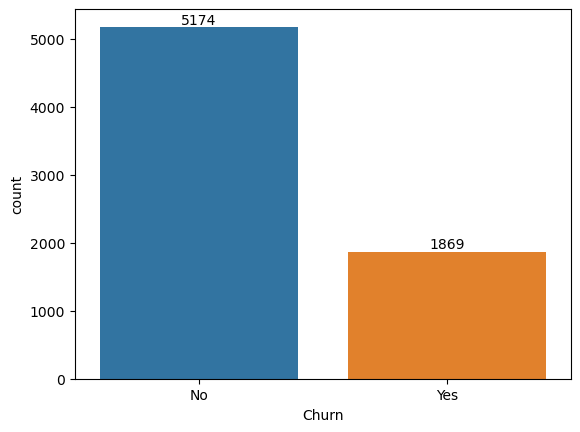

In [51]:
ax = sns.countplot(x = "Churn" , data =df)
ax.bar_label(ax.containers[0])
plt.show()

#### Percentage of churned Customers

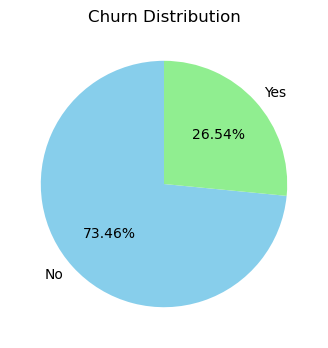

In [80]:
# Group by 'Churn' and count occurrences
gb = df.groupby("Churn").size()

# Plot pie chart
plt.figure(figsize=(5, 4))
plt.pie(gb, labels=gb.index, autopct='%1.2f%%', startangle=90, colors=["skyblue", "lightgreen"])
plt.title("Churn Distribution")
plt.show()


#### There are 26.54 % of our customers churned out

#### Gender Wise Churn

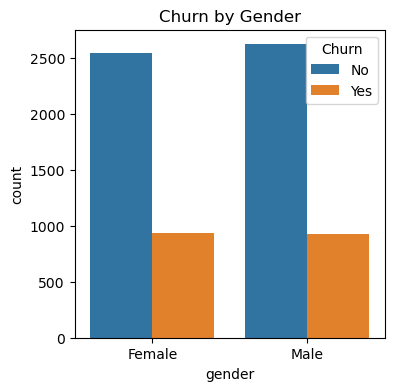

In [84]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'gender' , data = df , hue = 'Churn')
plt.title('Churn by Gender')
plt.show()

#### There is no as such difference in gender distribution regarding Churn

### Churn by Senior Citizen

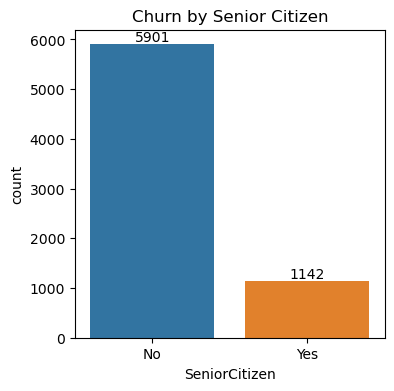

In [92]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'SeniorCitizen' , data = df )
ax.bar_label(ax.containers[0])
plt.title('Churn by Senior Citizen')
plt.show()

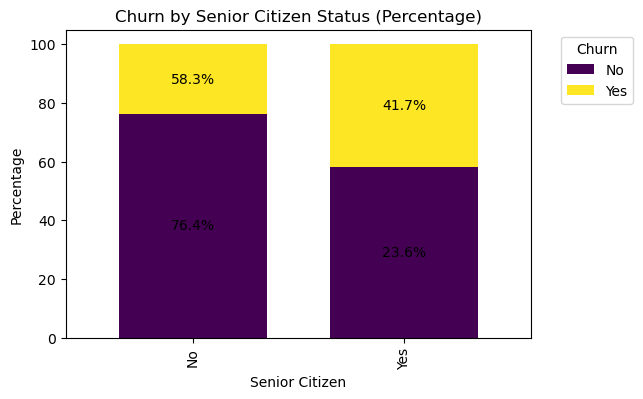

In [90]:
# Calculate counts and percentages
stacked_data = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)
stacked_percentages = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))
stacked_percentages.plot(
    kind="bar",
    stacked=True,
    figsize=(6, 4),
    colormap="viridis",
    ax=ax,
    width=0.7
)

# Add percentages on the bars
for i, bar in enumerate(ax.patches):
    # Calculate the bar's percentage value
    row = i // 2
    col = i % 2
    percentage = stacked_percentages.iloc[row, col]
    if percentage > 0:  # Avoid displaying zeros
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + bar.get_height() / 2
        ax.text(x, y, f"{percentage:.1f}%", ha="center", va="center", fontsize=10, color="black")

# Customize the chart
plt.title("Churn by Senior Citizen Status (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.show()

#### Comparatively a greater percentage of senior citizen have Churned

### Churned by Tenure

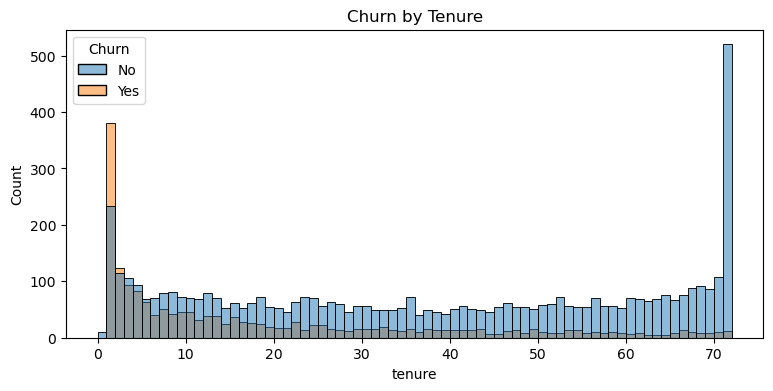

In [100]:
plt.figure(figsize = (9,4))
sns.histplot( x = 'tenure' , data = df , bins = 72 , hue = 'Churn')
plt.title('Churn by Tenure')
plt.show()

#### People who used our service for 1 month or 2 have churned out

## Churned based on Contract

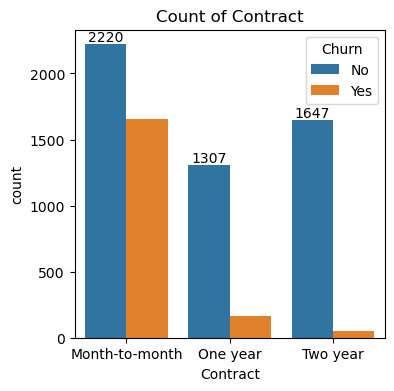

In [102]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract' , data = df , hue = 'Churn' )
ax.bar_label(ax.containers[0])
plt.title('Count of Contract')
plt.show()

#### People who have month to month contract are mostly churned out

In [105]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

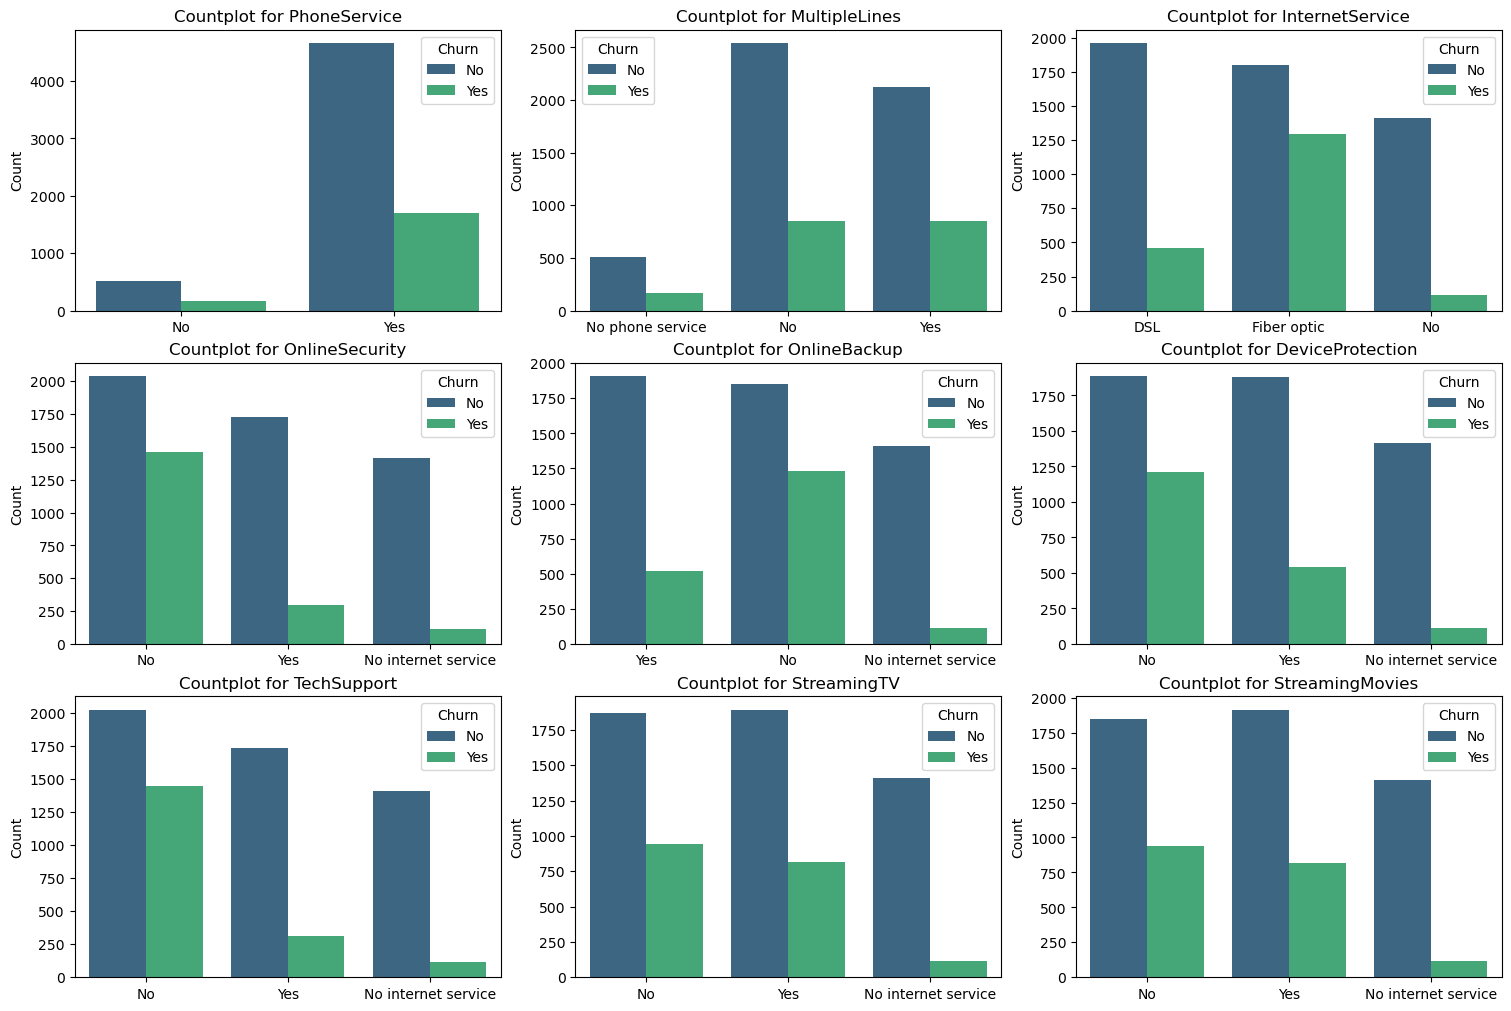

In [107]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Number of rows and columns for subplots
n_cols = 3
n_rows = -(-len(columns) // n_cols)  # Ceiling division for rows

# Create a figure for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()  # Flatten to make it easier to iterate

# Plot each column
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i], palette="viridis" , hue = df['Churn'])
    axes[i].set_title(f"Countplot for {column}")
    axes[i].set_xlabel("")  # Remove x-axis label for cleaner look
    axes[i].set_ylabel("Count")

# Hide unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Display the plots
plt.show()

#### 
The subplots visualize the relationship between churn and various customer services. Customers with "No" service in features like OnlineSecurity, TechSupport, and DeviceProtection appear to have higher churn rates compared to those who opted for these services. In contrast, features such as PhoneService and MultipleLines show relatively balanced churn rates. Services labeled as "No internet service" consistently indicate lower churn rates, likely due to a lack of relevance to customer dissatisfaction.

### Churned by Payment Method

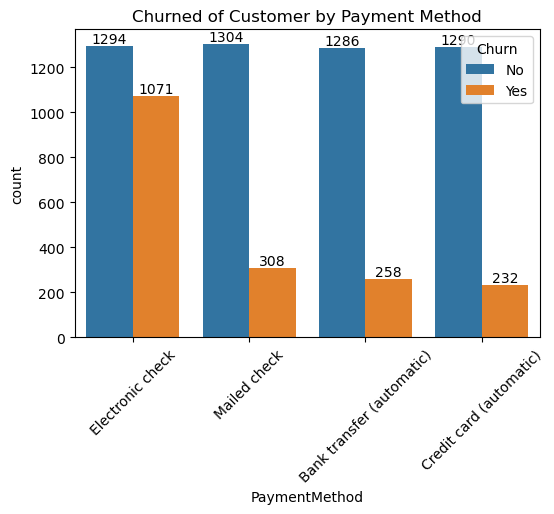

In [111]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaymentMethod' , data = df , hue = 'Churn' )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title('Churned of Customer by Payment Method')
plt.show()

#### People who are using Electronic check as payment method are mostly likely Churned out